In [1]:
from timeit import default_timer as timer
from sklearn import metrics
from sklearnex.model_selection import train_test_split
import warnings
from IPython.display import HTML
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
data = pd.read_csv("kidney_disease.csv")

In [3]:
data.head(5)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
# dropping id column
data.drop('id', axis = 1, inplace = True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

In [6]:

print(data['rbc'].unique())
print("############################")
print(data['pc'].unique())
print("############################")
print(data['pcc'].unique())
print("############################")
print(data['ba'].unique())
print("############################")
print(data['pcv'].unique())
print("############################")
print(data['wc'].unique())
print("############################")
print(data['rc'].unique())
print("############################")
print(data['htn'].unique())
print("############################")
print(data['dm'].unique())
print("############################")
print(data['cad'].unique())
print("############################")
print(data['appet'].unique())
print("############################")
print(data['pe'].unique())
print("############################")
print(data['ane'].unique())
print("############################")
print(data['classification'].unique())

[nan 'normal' 'abnormal']
############################
['normal' 'abnormal' nan]
############################
['notpresent' 'present' nan]
############################
['notpresent' 'present' nan]
############################
['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '\t?' '52' '14' '22' '18' '42' '17' '46' '23'
 '19' '25' '41' '26' '15' '21' '43' '20' '\t43' '47' '9' '49' '50' '53'
 '51' '54']
############################
['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '\t6200' '7100' '11800' '9400' '5500' '5800'
 '13200' '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800'
 '6500' '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300'
 '12400' '\t8400' '10500' '4200' '4700' '10900' '8100' '9500' '2200'
 '12800' '112

In [ ]:
pip install numpy

In [7]:
#Dealing with abnormally values:
import numpy as np
data=data.replace({'\t':np.nan , '\t43':43,'\t6200':6200 , '\t8400':8400, '\t?':np.nan,'ckd\t':"ckd","\tyes":"yes","\tno":"no"," yes":"yes"})

In [8]:
data.isnull().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wc                106
rc                131
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [9]:
# Select columns with numeric missing values
num_cols = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']

# Replace missing values with mean
for col in num_cols:
    data[col].fillna(data[col].mean(), inplace=True)



In [10]:
# Select columns with categorical missing values
cat_cols = ['rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

# Replace missing values using backfill
for col in cat_cols:
    data[col].fillna(method='backfill', inplace=True)


In [11]:
data.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

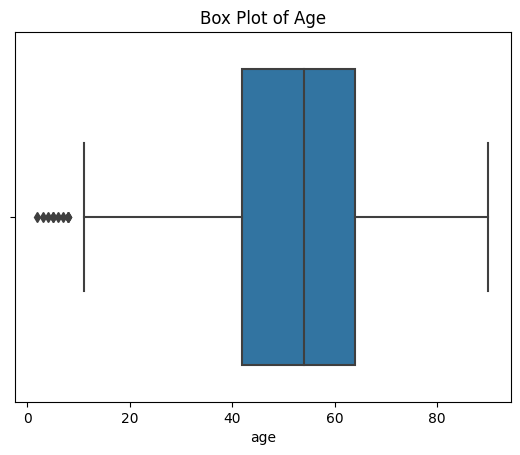

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='age', data=data)
plt.title('Box Plot of Age')
plt.show()


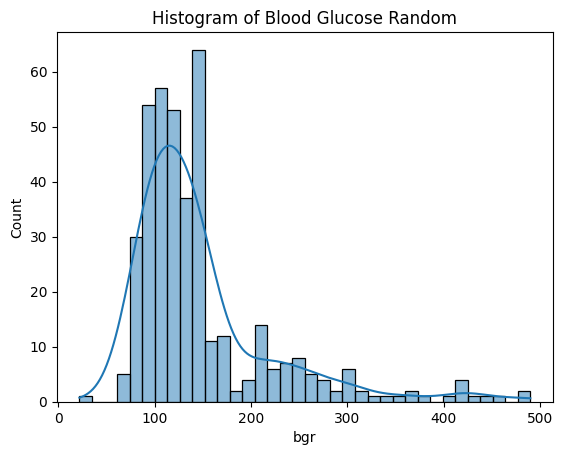

In [13]:
import seaborn as sns

sns.histplot(x='bgr', data=data, kde=True)
plt.title('Histogram of Blood Glucose Random')
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder
cat_cols = ['sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
for col in cat_cols:
    data[col] = label_encoder.fit_transform(data[col].astype(str))


In [15]:
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,4,1,0,1,1,0,0,121.000000,...,44,7800,5.2,1,1,0,0,0,0,0
1,7.0,50.0,4,5,0,1,1,0,0,148.036517,...,38,6000,3.9,0,0,0,0,0,0,0
2,62.0,80.0,1,3,4,1,1,0,0,423.000000,...,31,7500,3.9,0,1,0,1,0,1,0
3,48.0,70.0,0,5,0,1,0,1,0,117.000000,...,32,6700,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1,3,0,1,1,0,0,106.000000,...,35,7300,4.6,0,0,0,0,0,0,0


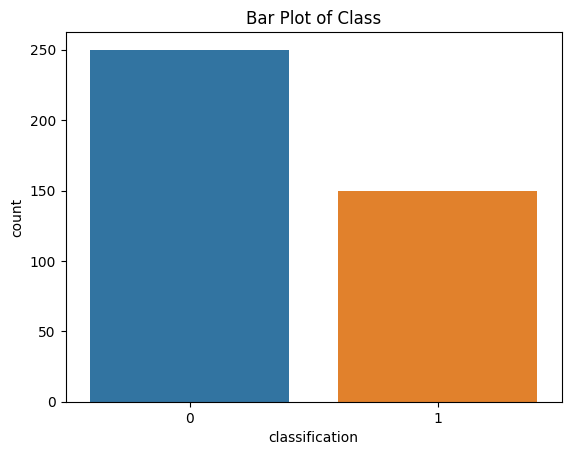

In [16]:
import seaborn as sns

sns.countplot(x='classification', data=data)
plt.title('Bar Plot of Class')
plt.show()


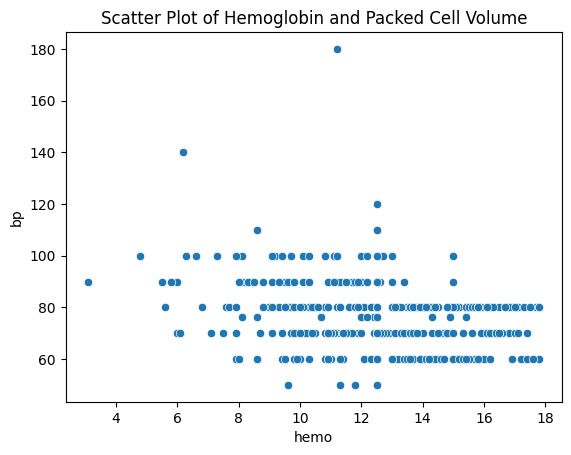

In [17]:
import seaborn as sns

sns.scatterplot(x='hemo', y='bp', data=data)
plt.title('Scatter Plot of Hemoglobin and Packed Cell Volume')
plt.show()


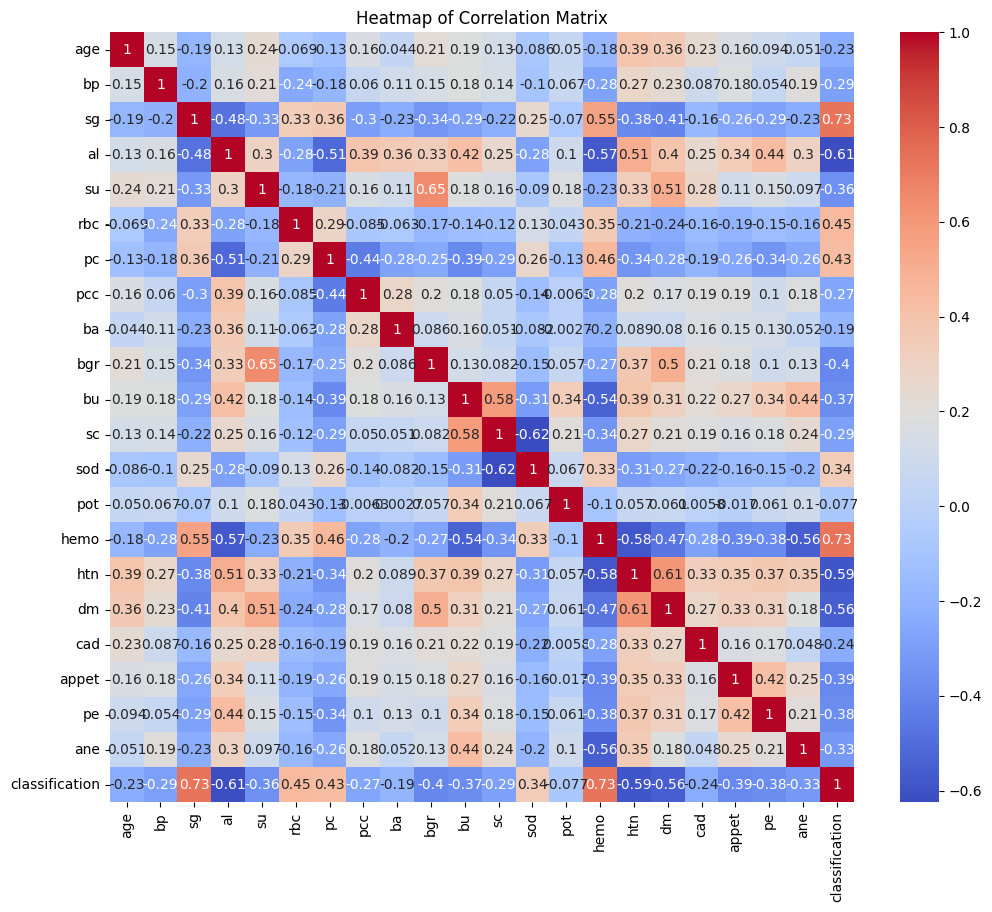

In [18]:
import seaborn as sns
corr_matrix = data.corr()
plt.figure(figsize=(12,10))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()


In [19]:
X = data.drop('classification', axis=1)
y = data['classification']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [21]:
acc=[]
model=[]

In [22]:
from sklearnex.linear_model import LogisticRegression
from sklearnex import patch_sklearn
patch_sklearn()

LogReg = LogisticRegression(random_state=2)

LogReg.fit(X_train,y_train)

predicted_values = LogReg.predict(X_test)

lr_acc = metrics.accuracy_score(y_test, predicted_values)

print("Logistic Regression's Accuracy is: ", lr_acc)



Logistic Regression's Accuracy is:  0.9625


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [23]:

from sklearnex.neighbors import KNeighborsClassifier
from sklearnex import patch_sklearn
patch_sklearn()
start = timer()
knn = KNeighborsClassifier().fit(X_train, y_train)
knn_acc = knn.score(X_train, y_train)
print("KNN's Accuracy is: ", knn_acc)

KNN's Accuracy is:  0.828125


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


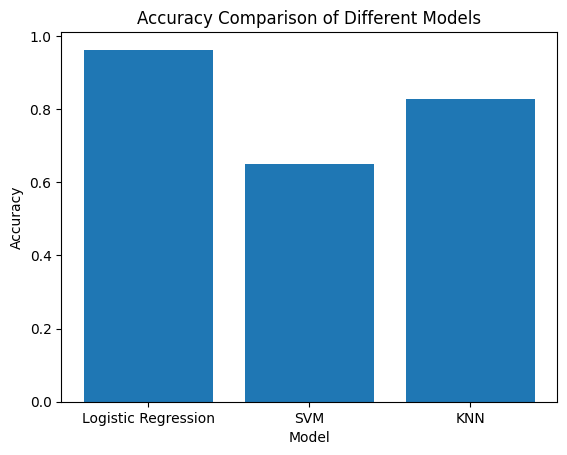

In [25]:
import matplotlib.pyplot as plt

# Define the accuracy values for each model
accuracy_values = [lr_acc,svm_acc,knn_acc]

# Define the labels for each model
model_labels = ['Logistic Regression', 'SVM', 'KNN']

# Plot a bar graph
plt.bar(model_labels, accuracy_values)

# Add a title and labels to the plot
plt.title('Accuracy Comparison of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Display the plot
plt.show()